In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

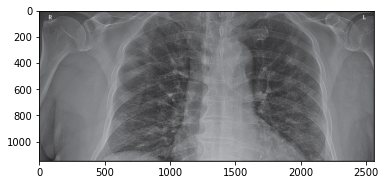

In [ ]:
# Read an image
img =mpimg.imread('/content/drive/My Drive/data/Train/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg')
imgplot = plt.imshow(img)

In [ ]:
# Initialising the CNN
model = Sequential()

# define the first convolution layer
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Adding a second convolution layer
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Add third convolution layer
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#Falttening
model.add(Flatten())
# Full connection
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation='sigmoid'))

#Compile the CNN model
model.compile(optimizer='rmsprop', 
              loss= 'binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
batch_size = 16

In [ ]:
"""
In general deep learning is only relevant when you have a huge amount of data, as we don't enough data( only 300 images)
in order to make the most of our few training examples, we will "augment" them via a number of random transformations, 
so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.
In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class. This class allows you to:
      * configure random transformations and normalization operations to be done on your image data during training
      * instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). 
These generators can then be used with the Keras model methods that accept data generators as inputs, fit_generator, evaluate_generator 
and predict_generator.
"""

In [ ]:
# We define the data augmentation for training
train_datagen = ImageDataGenerator(rotation_range=40,         
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
#We define the data augmentation  for testing
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# We instantiate the generator that will read pictures found in subfolers ('data/Train' in my case), and indefinitely generate
# batches of augmented image data. In my train folder I have 154 imges belogingbelonging to 2 classes( covid and nocovid)

train_generator = train_datagen.flow_from_directory(
                                                '/content/drive/My Drive/data/Train',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')
 #generator for test data
 #In my test folder I have 83 imges belogingbelonging to 2 classes( covid and nocovid)
test_generator = test_datagen.flow_from_directory(
                                                '/content/drive/My Drive/data/Test',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

Found 154 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


In [ ]:
# now we are going to train our model using the gererators
model.fit_generator(train_generator,
                    steps_per_epoch =10 ,          
                    epochs = 50,
                    validation_data = test_generator,
                    validation_steps = 500)       

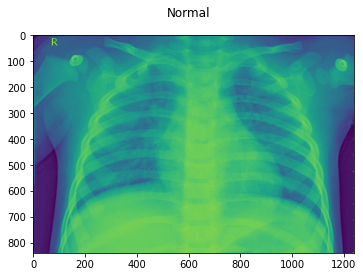

In [ ]:
img_src = '/content/drive/My Drive/data/predict/person1_bacteria_2.jpeg'
img = cv2.imread(img_src)

img_pred = image.load_img('/content/drive/My Drive/data/predict/person1_bacteria_2.jpeg',
                          target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = model.predict(img_pred)

ind = train_generator.class_indices
if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)
img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)
fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)
np_img = mpimg.imread(img_src)
plt.imshow(np_img)


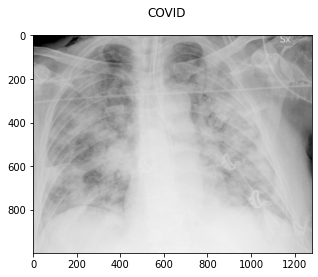

In [ ]:
img_src = '/content/drive/My Drive/data/predict/covid4.jpeg'
img = cv2.imread(img_src)

img_pred = image.load_img('/content/drive/My Drive/data/predict/covid5.jpeg',
                          target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = model.predict(img_pred)
ind = train_generator.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)
fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)
np_img = mpimg.imread(img_src)
plt.imshow(np_img)